# Example Notebook

In [9]:
from data_disaggregation import Dimension, ExtensiveVariable
from data_disaggregation.draw import draw_transform, draw_domain
from IPython.display import Image, display

In [10]:
# create dimension hierarchies

time = Dimension("time")
hour = time.add_level("hour", [1, 2, 3])

space = Dimension("space")
region = space.add_level("region", ["r1", "r2"])
subregion = region.add_level("subregion", {"r1": ["sr1_1", "sr1_2"], "r2": ["sr2_1"]})

sector = Dimension("sector")
sector_a = sector.add_level("sector_a", ["sa1", "sa2"])
sector_b = sector.add_level("sector_b", ["sb1", "sb2", "sb3"])

v1
subregion sector_a     
sr1_1     sa1       2.0
          sa2       0.0
sr1_2     sa1       4.0
          sa2       0.0
sr2_1     sa1       0.0
          sa2       5.0

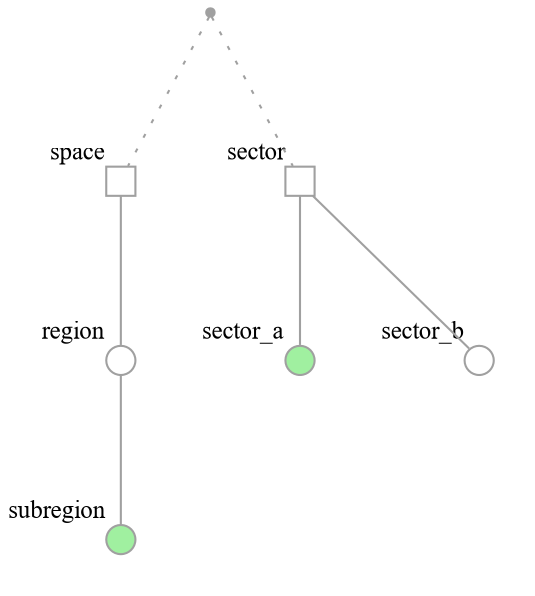

In [11]:
# create extensive variable v1

v1 = ExtensiveVariable(
    data={
        ("sr1_1", "sa1"): 2,
        ("sr1_2", "sa1"): 3,
        ("sr1_2", "sa1"): 4,
        ("sr2_1", "sa2"): 5,
    },
    domain=[subregion, sector_a],
)

# show data and image for domain
display(v1.to_series().to_frame("v1"))
display(Image(draw_domain(v1)))

,w2
sector_b,
sb1,1.0
sb2,4.0
sb3,5.0


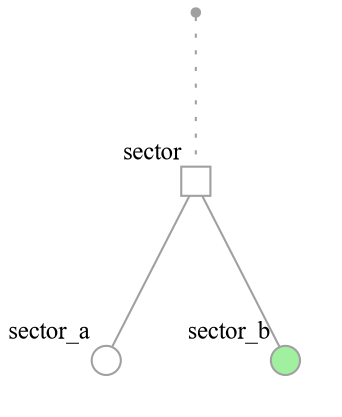

In [12]:
# create extensive variable v2

w2 = ExtensiveVariable(
    data={"sb1": 1, "sb2": 4, "sb3": 5},
    domain=[sector_b],
)

# show data and image for domain
display(w2.to_series().to_frame("w2"))
display(Image(draw_domain(w2)))

,w3
hour,
1,3.0
2,3.0
3,4.0


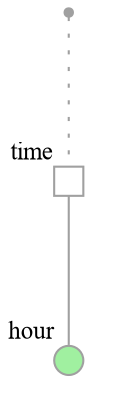

In [13]:
# create extensive variable v3

w3 = ExtensiveVariable(
    data={1: 3, 2: 3, 3: 4},
    domain=[hour],
)

# show data and image for domain
display(w3.to_series().to_frame("w3"))
display(Image(draw_domain(w3)))

v4
sector_b hour      
sb1      1     0.33
         2     0.33
         3     0.44
sb2      1     1.32
         2     1.32
         3     1.76
sb3      1     1.65
         2     1.65
         3     2.20

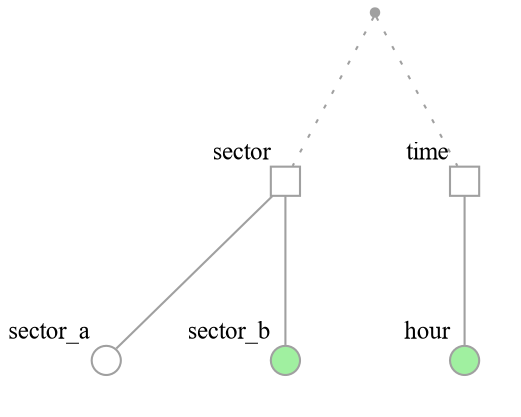

{'sector_b': 'w2'} disaggregate sector sector/sector_b
{'sector_b': 'w2'} disaggregate time time/hour


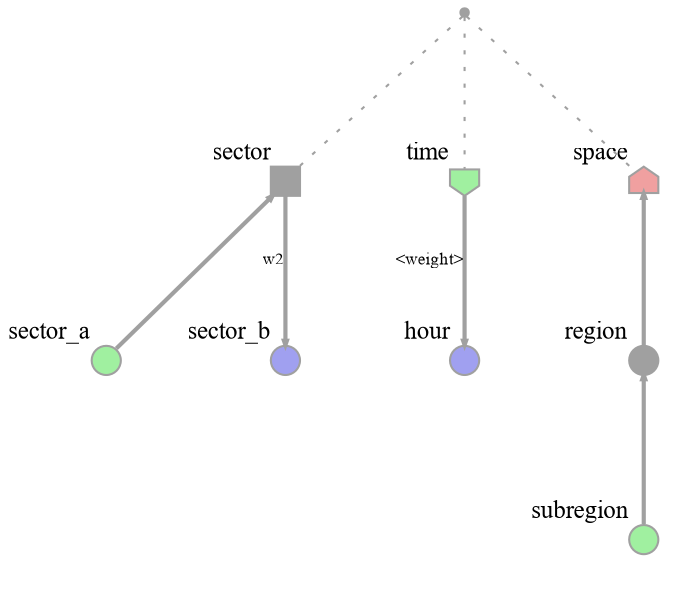

In [15]:
# transform to target dimension
target = {"domain": [sector_b, hour], "level_weights": {"sector_b": w2, "hour": w3}}
v4 = v1.transform(**target)

# show result and steps
display(v4.to_series().to_frame("v4"))
display(Image(draw_domain(v4)))
display(Image(draw_transform(
    v1.get_transform_steps(**target),
    weight_names={"sector_b": "w2"})
))